#Introduction to Locally linear embedding (LLE)

## 1. Introduction


### Intro and objectives


### In this lab you will learn:
1. A basic example of LLE
### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 2. Load and check data
### 2.1 Let's create some synthetic data

In [4]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding


X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [6]:
X_swiss

array([[-3.29677117,  4.26198454,  7.69787682],
       [ 5.95972743, 11.45784273, 12.72625276],
       [ 6.66051523, 18.15820401, -9.84713337],
       ...,
       [ 6.18364276,  1.44095323, -1.71242696],
       [ 5.86076169,  1.09185823, 12.47091112],
       [-8.16213703,  5.61235668,  4.51171684]])

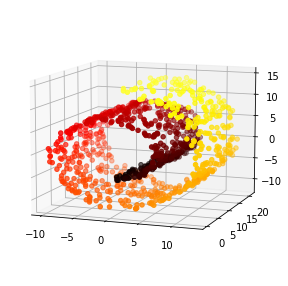

In [9]:


from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)


plt.show()

## 3. Let's apply LLE

In [10]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

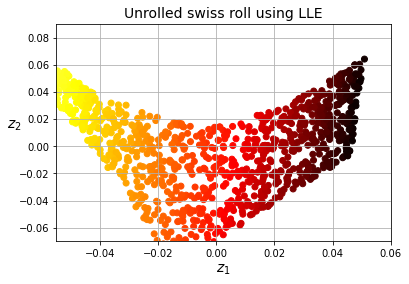

In [11]:


plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)


plt.title("Unrolled swiss roll using LLE")
plt.show()

#### Based on the previous figure we conclude that LLE was able to project the original dataset into a two dimensional projection